# Second model - Polish Dataset

## Libraries

In [3]:
!pip install transformers
!pip install -q pyyaml h5py
import pandas as pd
from transformers import *
import numpy as np
from sklearn.model_selection import train_test_split


     |████████████████████████████████| 573kB 2.7MB/s 
     |████████████████████████████████| 890kB 10.8MB/s 
     |████████████████████████████████| 3.7MB 13.7MB/s 
     |████████████████████████████████| 1.0MB 33.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=041fd87876daf66f7f7ac06a6219a00e21ff53fc4d3db462c672ca2990d39f6a
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


## Data Preprocessing

*   Reading data
*   Change columns names
*   Drop NaN rows
*   Fill others NaN values by special sign

In [93]:
df = pd.read_excel('polishOriginalDataset.xlsx')
df.reset_index()
df = df.iloc[:,[6,8,9,10,15,16,19,21,5]]
df.columns = [
              "type_of_sentence",
              "verb_main_semantic_class",
              "verb_second_semantic_class",
              "verb_third_semantic_class",
              "verb_veridical_positive",
              "verb_veridical_negative",
              "verb_tense",
              "t_negation",
              "semantic_relation"
              ]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")
df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o?,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,percepcyjny,none,"""+""","""+""",past,0,N
4,1,epistemiczny,percepcyjny,none,o,o,present,0,N


### Cleaning data by deleting uncertainty - simplification 

In [94]:
# df.type_of_sentence.unique() cleaning not needed 
# df.verb_main_semantic_class.unique() cleaning not needed
# df.verb_second_semantic_class.unique() cleaning not needed 
# df.verb_third_semantic_class.unique() cleaning not needed

# verb veridical positive cleaning
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '?' if '?' in x else x)

# verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

# df.verb_tense.unique() cleaning not needed
# df.t_negation.unique() cleaning not needed
# df.semantic_relation.unique() cleaning not needed 

df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,percepcyjny,none,+,+,past,0,N
4,1,epistemiczny,percepcyjny,none,o,o,present,0,N


#### Possible feature values

In [0]:
print(df.type_of_sentence.unique())
print(df.verb_main_semantic_class.unique())
print(df.verb_second_semantic_class.unique())
print(df.verb_third_semantic_class.unique())
print(df.verb_veridical_positive.unique())
print(df.verb_veridical_negative.unique())
print(df.verb_tense.unique())
print(df.t_negation.unique())


AttributeError: ignored

In [0]:
# choose columns 
df = df[[
  "verb_veridical_positive",
  "verb_veridical_negative",
  "verb_tense",
  "t_negation",
  "semantic_relation"      
]]
df.to_csv("plData.csv", index=False)

### vectorize data and split to features and target

In [99]:
df = pd.get_dummies(df)

X_train = df.iloc[:,1:-4]
y_train = df.iloc[:,-4:]

X_train.head()

,verb_veridical_positive_+,verb_veridical_positive_-,verb_veridical_positive_?,verb_veridical_positive_o,verb_veridical_negative_+,verb_veridical_negative_-,verb_veridical_negative_?,verb_veridical_negative_o,verb_tense_brak,verb_tense_future,verb_tense_past,verb_tense_present
0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,1


In [100]:
y_train.head()

,semantic_relation_?,semantic_relation_C,semantic_relation_E,semantic_relation_N
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


***
# Keras model building

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [102]:
model = tf.keras.Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
print("Model input size {}".format(n_cols))
#add model layers
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model input size 12
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_95 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_96 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 68        
Total params: 1,348
Trainable params: 1,348
Non-trainable params: 0
_________________________________________________________________


## Training model on prepared data

In [103]:
#train model
history = model.fit(X_train, y_train, validation_split=0.4, epochs=30)

Epoch 1/30
49/49 [==============================] - 0s 4ms/step - loss: 1.2809 - accuracy: 0.6243 - val_loss: 1.0049 - val_accuracy: 0.8903
Epoch 2/30
49/49 [==============================] - 0s 3ms/step - loss: 0.8839 - accuracy: 0.8587 - val_loss: 0.5471 - val_accuracy: 0.8961
Epoch 3/30
49/49 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.8574 - val_loss: 0.4335 - val_accuracy: 0.8961
Epoch 4/30
49/49 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.8606 - val_loss: 0.4299 - val_accuracy: 0.8941
Epoch 5/30
49/49 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.8593 - val_loss: 0.4211 - val_accuracy: 0.8941
Epoch 6/30
49/49 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8593 - val_loss: 0.4108 - val_accuracy: 0.8961
Epoch 7/30
49/49 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.8593 - val_loss: 0.4096 - val_accuracy: 0.8941
Epoch 8/30
49/49 [==

## plot with train and test accuracy

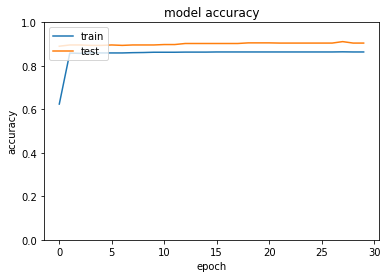

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

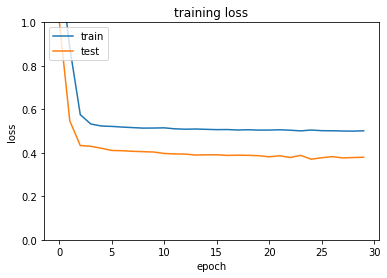

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save model 


In [0]:
model.save('featureModelPl.h5')